In [ ]:
"""
análise descritiva = o que aconteceu, aprendendo com dados do passado
variável qualitativa (nominal, ordinal) e quantitativa (intervalar, razão)


"""

In [2]:
import pandas as pd # Biblioteca de Manipulação de dados
import matplotlib.pyplot as plt # Biblioteca de Visualização de dados
import seaborn as sns # Biblioteca de Visualização de dados
import numpy as np # Biblioteca de funções matemáticas e manipulação de vetores
from scipy.stats import norm # Pacote de Funções científicas estatísticas, etc
from sklearn.datasets import load_iris # Pacote para machine learning mas por enquanto mas somente importar o Data Set Iris :)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
iris = load_iris() #importando o iris
df_iris = pd.DataFrame(np.column_stack((iris.data, iris.target)), columns = iris.feature_names + ['target']) # Transformando o iris em um Data Frame

In [ ]:
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
df_iris.target.value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [ ]:
# A função getNames avalia o parâmetro "target" e retorna o nome da espécia para cada parâmetro.
def getNames(target):
  if (target ==0.0):
    return "Setosa"
  elif (target ==1.0):
    return "Versicolor"
  elif (target ==2.0):
    return "Virginica"

In [ ]:
#apply qual coluna, o parametro e nome da função
df_iris['species']=df_iris['target'].apply(getNames) 

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,Setosa
1,4.9,3.0,1.4,0.2,0.0,Setosa
2,4.7,3.2,1.3,0.2,0.0,Setosa
3,4.6,3.1,1.5,0.2,0.0,Setosa
4,5.0,3.6,1.4,0.2,0.0,Setosa


In [ ]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.7,3.0,5.2,2.3,2.0,Virginica
146,6.3,2.5,5.0,1.9,2.0,Virginica
147,6.5,3.0,5.2,2.0,2.0,Virginica
148,6.2,3.4,5.4,2.3,2.0,Virginica
149,5.9,3.0,5.1,1.8,2.0,Virginica


In [ ]:
"""
população (totalidade) x amostra (fração representativa)

media populacional/amostral: somatorio de um até n/n
"""

In [ ]:
#média
df_iris.groupby(['species'])['sepal width (cm)'].mean() 

species
Setosa        3.428
Versicolor    2.770
Virginica     2.974
Name: sepal width (cm), dtype: float64

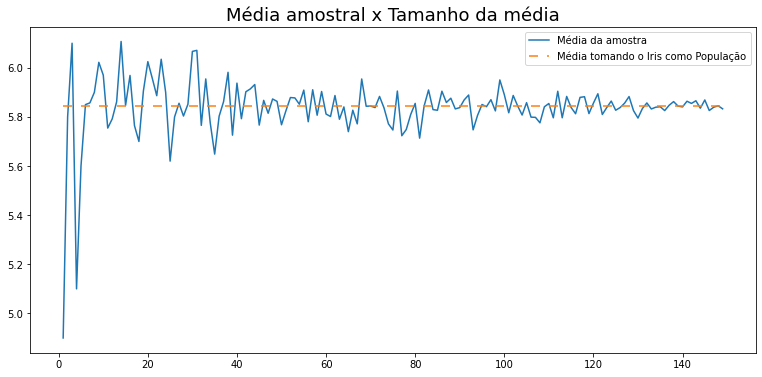

In [4]:
# Nos próximos dois exemplos vamos imaginar que a média de sepal length (cm) da amostra de 150 registro é igual a média da população.
# Vamos construir um gráfico de Linhas.
# No eixo x o tamanho da amostra 1 a 150. No eixo y teremos a média para cada amostra de (1 a 150) '

################################################

# Obtendo os dados para o gráfico

lista_media=[]  # Cria lista_media vazia
lista_media_amostra=[] # Cria lista_media amostra vazia
lista_n=[] # Cria lista_n 

for i in range(1,150): # Executa o código indentado abaxo 150 vezes
  amostra = df_iris['sepal length (cm)'].sample(i) # Sorteia i + 1 valores para a amostra. (como i começa em 0 vamos sortear valores de 1 até 150)
  lista_media_amostra.append(amostra.mean()) # Adiciona a média da amostra sorteada a uma posição na lista 
  lista_media.append(df_iris['sepal length (cm)'].mean()) # Adiciona a média de 'sepal length (cm)' a uma posição na lista. Note que estes números são sempre iguais
  lista_n.append(i) # Adiciona o tamanho da amostra na lista_n

##############################################

# Montando o Gráfico

fig, ax = plt.subplots(figsize=(13,6)) # Definindo o tamnho do gráfico
plt.title('Média amostral x Tamanho da média', fontsize=18) # Colocando o título do gráfico com o tamanho da fonte 18
line1 = ax.plot(lista_n, lista_media_amostra, label='Média da amostra') # Linha da média da amostra
line2 = ax.plot(lista_n, lista_media , dashes=[6, 6], label='Média tomando o Iris como População') # Linha tracejada para a média da "população" 
ax.legend() # Apresenta a Legenda
plt.show() # Apresenta o gráfico


 A média das médias das amostras sorteadas: 5.84468

 Admitindo a média de sepal length no df_iris como a média da população: 5.843333333333335


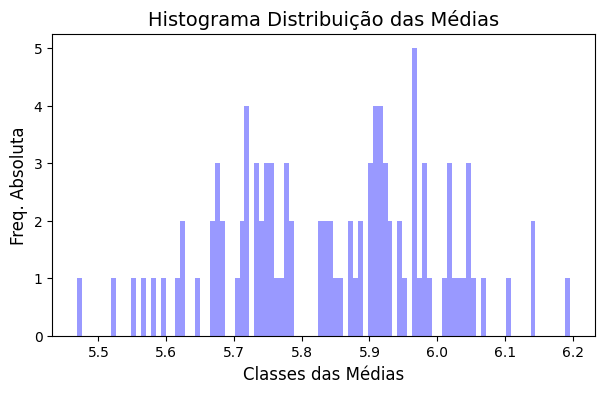

In [9]:
# Vamos sortear varias vezes uma amostra de 25 elementos.
 
lista_media_amostra2=[] # Inicia a lista vazia lista_media_amostra2

n=100 # Número de sorteios - max 100000
for i in range(n): # Executa o código indentado n vezes
  amostra = df_iris['sepal length (cm)'].sample(25) # sorteia 25 registros com sample
  lista_media_amostra2.append(amostra.mean()) # Adiciona a média da amostra 


##############################################
# Montando o Gráfico
plt.subplots(figsize=(7,4), dpi=100) # Definindo o tamanho do gráfico e setando um zoom
sns.distplot(lista_media_amostra2, kde=False, color='blue', bins=100) # construindo um histograma azul com possibilidade de até 100 classes
plt.title('Histograma Distribuição das Médias',fontsize=14) # Incluindo o título do gráfico com uma fonte 14
plt.xlabel('Classes das Médias', fontsize=12) # Incluindo o nome do eixo x com uma fonte 12
plt.ylabel('Freq. Absoluta', fontsize=12) # Incluindo o nome do eixo y com uma fonte 12


print(" A média das médias das amostras sorteadas:", np.mean(lista_media_amostra2)) # Apresentando a média das médias
print("")
print(' Admitindo a média de sepal length no df_iris como a média da população:', df_iris['sepal length (cm)'].mean())

In [ ]:
"""
moda = o que mais aparece
mediana = divide no meio
quartis = no 1º quartil, deixa 25% das observações abaixo e 75% acima
o 3º quartil é 75% abaixo e 25% acima, já o 2Q deixa 50% abaixo e 50% acima
"""

Text(0, 0.5, 'Freq. Absoluta')

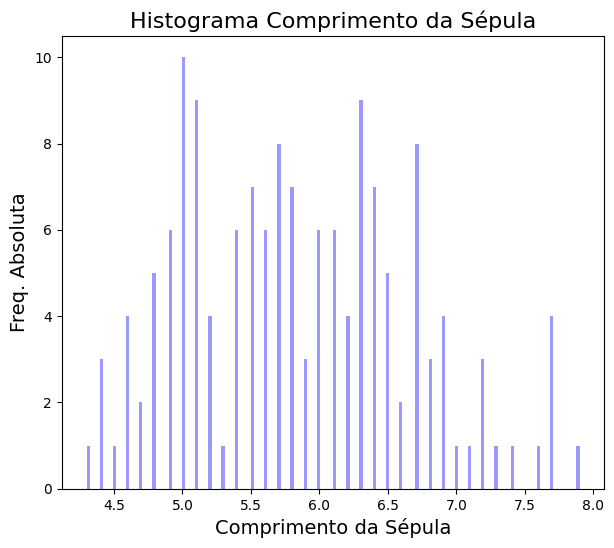

In [ ]:
plt.subplots(figsize=(7,6), dpi=100) # Definindo o tamanho do gráfico e setando um zoom
sns.distplot(df_iris['sepal length (cm)'], kde=False, color='blue',bins=150) # construindo um histograma azul com possibilidade de até 150 classes
plt.title('Histograma Comprimento da Sépula', fontsize=16) # Incluindo o título do gráfico com uma fonte 16
plt.xlabel('Comprimento da Sépula', fontsize=14) # Incluindo o nome do eixo x com uma fonte 14
plt.ylabel('Freq. Absoluta', fontsize=14) # Incluindo o nome do eixo y com uma fonte 14

In [ ]:
df_iris['sepal length (cm)'].mode() # Obtendo a moda 

0    5.0
dtype: float64

In [ ]:
df_iris['sepal length (cm)'].median() # Obtendo a mediana 

5.8

In [ ]:
df_iris['sepal length (cm)'].quantile([.25, .5, 0.75]) # Obtendo os quartis

0.25    5.1
0.50    5.8
0.75    6.4
Name: sepal length (cm), dtype: float64

In [11]:
df_iris['sepal length (cm)'].quantile([.50]) # Obtendo outras posições na distribuição ... Percentis

0.5    5.8
Name: sepal length (cm), dtype: float64

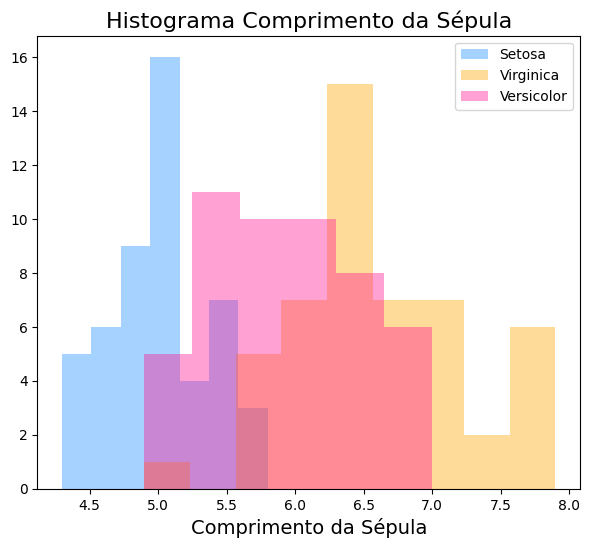

In [ ]:
plt.subplots(figsize=(7,6), dpi=100) # Definimos tamanho do gráfico e Zomm
sns.distplot( df_iris.loc[df_iris.species=='Setosa', "sepal length (cm)"] ,kde=False, color="dodgerblue", label="Setosa") # Adiciona Setosa  de cor Azul  
sns.distplot( df_iris.loc[df_iris.species=='Virginica', "sepal length (cm)"] ,kde=False, color="orange", label="Virginica") # Adiciona Setosa  de cor Laranja
sns.distplot( df_iris.loc[df_iris.species=='Versicolor', "sepal length (cm)"] ,kde=False, color="deeppink", label="Versicolor") # Adiciona Setosa  de cor Rosa
# kde=False não apresenta a curva de desnidade.

plt.xlabel('Comprimento da Sépula', fontsize=14) # Adicionamos o título do eixo X com fonte 14
plt.title('Histograma Comprimento da Sépula', fontsize=16) # Adicionamos o título do gráfico com fonte 16
plt.legend()
plt.show()

In [ ]:
df_iris.groupby(['species'])['sepal length (cm)'].mean() # Para calcular a média por espécie podemos calcular utilizando o 'groupby'


species
Setosa        5.006
Versicolor    5.936
Virginica     6.588
Name: sepal length (cm), dtype: float64

In [ ]:
df_iris["sepal length (cm)"].describe()  # describe apresenta medidas estatísticas rápidas

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

In [ ]:
df_iris.describe() #!CUIDADO COM AS VARIÁVEIS CATEGÓRICAS!

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
"""
para distribuições não assimetricas, a mediana é melhor (sempre fica no meio);
a media é melhor só quando é simetrica
para distorções à esquerda, a moda vai estar a esquerda e vice versa
"""

In [18]:
dados=[1,2,2,3,3,4,4,4,5,5,100]

print("A média é: ", np.mean(dados))
print("A mediana é: ",np.median(dados))

A média é:  12.090909090909092
A mediana é:  4.0


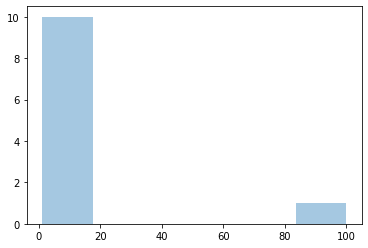

In [19]:
sns.distplot(dados,bins=6,kde=False) #CUIDADO!

In [ ]:
"""
box plot

gráfico bem famoso: uma caixa com um lado de baixo do q1, do outro lado o q3
e a linha no meio é a mediana
os bigodes do box plot, no limite inferior é o q1+1,5 e do limite superior tb
há ainda os outliers que seriam dados discrepantes, bem fora do normal
"""

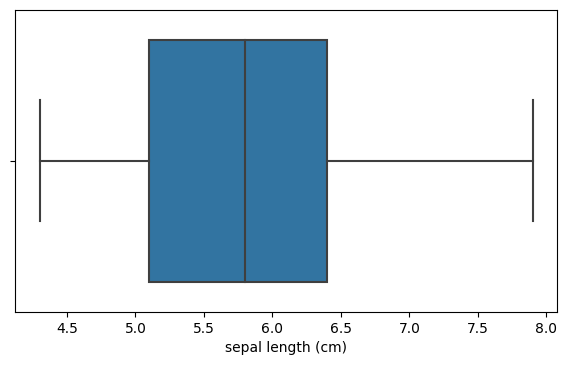

In [22]:
plt.subplots(figsize=(7,4), dpi=100) # Define tamanho da figura e zoom
ax = sns.boxplot(x=df_iris["sepal length (cm)"]) # Monta o Box Plot para "sepal length (cm)"

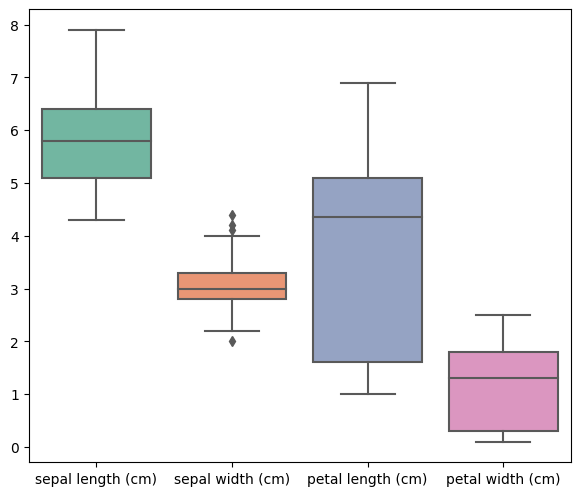

In [25]:
iris_caracateristicas=df_iris[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']] # Seleciona colunas
plt.subplots(figsize=(7,6), dpi=100) # Setando tamanho do gráfico e zoom
ax = sns.boxplot(data=iris_caracateristicas, orient="v", palette="Set2") # Constroi o BoxPlot

In [ ]:
#VER
plt.subplots(figsize=(8,4), dpi=100) # Setando tamanho do gráfico e zoom
ax = sns.boxplot(x="species ", y="petal length (cm)", data=df_iris) # Constroi o boxplot 'sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)'

In [ ]:
"""
Variabilidade: diversificação dos valores de uma variável em torno 
de uma tendencia central

variancia = Var. amostral = (x1 – x)² + (x2 – x)² + (x3 – x)² + ... + (xn – x)²
                      ​n – 1 
           Var. populacional = (x1 – x)² + (x2 – x)² + (x3 – x)² + ... + (xn – x)²
                           n
desvio padrão = raiz da variancia
intervalo interquartilico = IQR = q3 - q1
amplitude = max-min

"""

In [30]:
dados=[1,1,1,2,2,3,4,5,5,5]

somatorio=0

for i in dados:
  somatorio+= (i - np.mean(dados))**2  # Forma Pythonica de escrever somatorio = somatiorio + (i - np.mean(dados))**2

var_pop =somatorio/len(dados)
var_amo=somatorio/(len(dados)-1)

print('A variancia populacional é: ',var_pop)
print('A variancia amostral é: ',var_amo)

A variancia populacional é:  2.6900000000000004
A variancia amostral é:  2.988888888888889


In [31]:
print('A variancia populacional é: ',np.var(dados)) #utilizando o numpy para encontrar a variância
print('A variancia amostral é: ',np.var(dados,ddof=1))

A variancia populacional é:  2.69
A variancia amostral é:  2.988888888888889


In [32]:
pd.Series(dados).var()  # O Pandas já calcula de forma amostral caso queria o populacional temos que setar ddof=0

2.988888888888889

In [33]:
#DESVIO PADRÃO
np.sqrt(var_pop) # populacional

1.6401219466856727

In [34]:
np.sqrt(var_amo) # amostral

1.728840330651992

In [35]:
print('O Desvio padrão populacional é: ',np.std(dados)) #utilizando o numpy para encontrar o desvio padrão
print('O Desvio padrão amostral é: ',np.std(dados,ddof=1))

O Desvio padrão populacional é:  1.6401219466856725
O Desvio padrão amostral é:  1.728840330651992


In [36]:
pd.Series(dados).std(ddof=0)  # O Pandas já calcula de forma amostral caso queria o populacional temos que setar ddof=0

1.6401219466856727

In [37]:
#INTERVALO INTERQUARTÍLICO
from scipy.stats import iqr  # Variância e desvio padrão levam em conta  a média, portanto sofrem o efeito dos outiliers. O IQR não sofre este efeito.
print("O IQR é: ", iqr(dados))

O IQR é:  3.5


In [38]:
#CORRELAÇÃO
A = np.max(dados)-np.min(dados)
print('A amplitude é:', A)

A amplitude é: 4


In [ ]:
"""
CORRELAÇÃO: indicador da relação entre duas variáveis

CAUSALIDADE = quando há a relação entre uma variavel x e uma variavel y e 
o y é consequencia de x. 

A correlação não garante causalidade, isso é 
chamado de correlação espúria, onde não tem nenhuma relação causa-efeito.
Essa relação pode ocorrer por pura coincidencia ou por causa de uma terceira
variavel

COEFICIENTE DE CORRELAÇÃO DE PEARSON
comparação entre duas variaveis: https://www.youtube.com/watch?v=Pmmjb78j_Rg


"""

In [39]:
df_iris.corr() # Obtebdo as correlações (Pandas)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


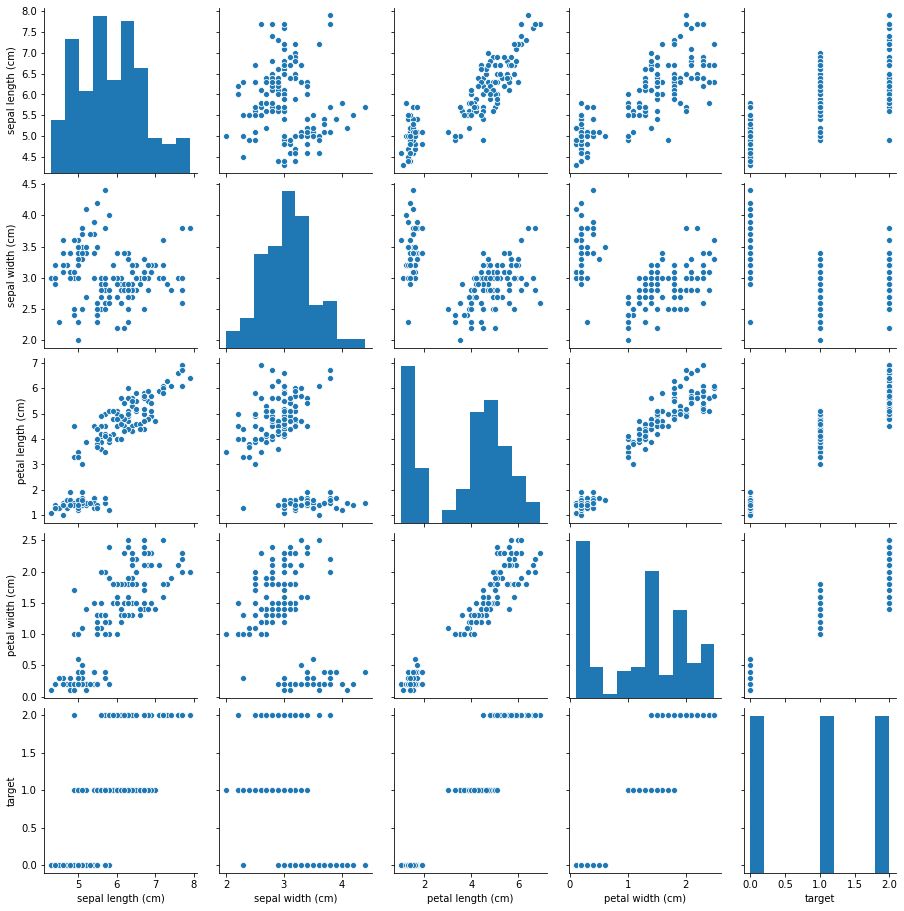

In [40]:
sns.pairplot(df_iris) # Plotando um Pairplot
plt.show()

In [ ]:
#VER
sns.pairplot(df_iris, hue="species") # Plotando um Pairplot Segmentado por especie
plt.show()

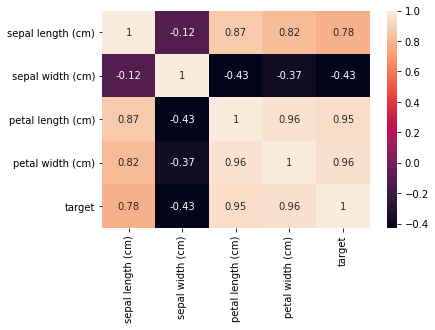

In [42]:
sns.heatmap(df_iris.corr(), annot = True) # Plotando um HeatMap
plt.show()

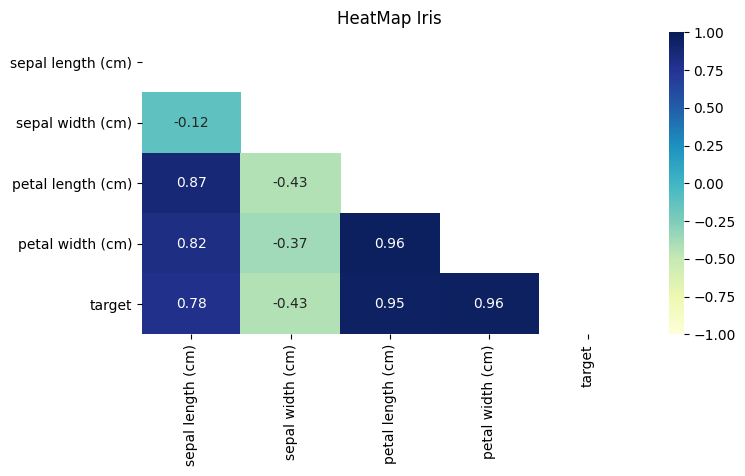

In [48]:
matrix = np.triu(df_iris.corr()) # Plotando um HeatMap com uma vizualisação mais fácil
plt.subplots(figsize=(8,4), dpi=100)

plt.title('HeatMap Iris')
sns.heatmap(df_iris.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'YlGnBu' )  #'coolwarm'

plt.show()

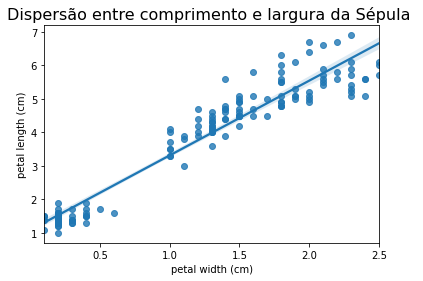

In [46]:
plt.title('Dispersão entre comprimento e largura da Sépula ', fontsize=16)
sns.regplot(x="petal width (cm)", y="petal length (cm)", data=df_iris);
#a reta é regressão linear

In [ ]:
"""
TRANSFORMAÇÃO DE DADOS: trazer os dados na mesma escala, obter uma distribuição
normal

NORMALIZAÇÃO: (Xi - Xmin)/(Xmax - Xmin)    
PADRONIZAÇÃO: (Xi - média(X))/desvio padrão
OUTRAS: passar o log, a raiz nos dados....
"""

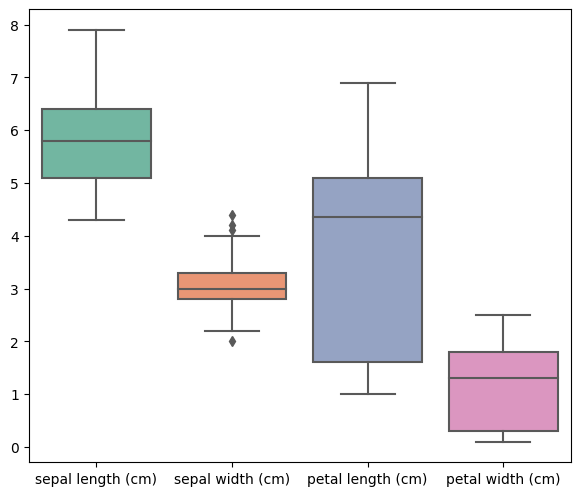

In [49]:
iris_caracateristicas=df_iris[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']]
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.boxplot(data=iris_caracateristicas, orient="v", palette="Set2")

In [50]:
# Vamos Padronizar e normalizar via funções

def PadronizarX(x,x_medio,desvioX):
  return ((x -x_medio)/desvioX)

def NormalizarX(x,x_min,x_max):
  return ((x -x_min)/(x_max-x_min))

In [51]:
sepal_length_padr=[]
sepal_length_norm=[]
petal_width_padr=[]
petal_width_norm=[]

for i in df_iris["sepal length (cm)"].tolist():
  sepal_length_padr.append(PadronizarX(i,df_iris["sepal length (cm)"].mean(),df_iris["sepal length (cm)"].std()))
  sepal_length_norm.append(NormalizarX(i,df_iris["sepal length (cm)"].min(),df_iris["sepal length (cm)"].max()))
  
for i in df_iris["petal width (cm)"].tolist():  
  petal_width_padr.append(PadronizarX(i,df_iris["petal width (cm)"].mean(),df_iris["petal width (cm)"].std()))
  petal_width_norm.append(NormalizarX(i,df_iris["petal width (cm)"].min(),df_iris["petal width (cm)"].max()))


df_iris['sepal_length_padr']=sepal_length_padr
df_iris['sepal_length_norm']=sepal_length_norm
df_iris['petal_width_padr']=petal_width_padr
df_iris['petal_width_norm']=petal_width_norm

In [52]:
print('################ Verificando médias e Desvios Padronizados #################' )
print("")
print("A média de sepal_length_padr é: ", df_iris.sepal_length_padr.mean())
print("O desvio de sepal_length_padr é: ", df_iris.sepal_length_padr.std())
print("A média de petal_width_padr é: ", df_iris.petal_width_padr.mean())
print("O desvio de petal_width_padr é: ", df_iris.petal_width_padr.std())
print("")
print('################ Verificando os intervalos normalizados #################' )
print("")
print("O min de petal_width_norm é: ", df_iris.petal_width_norm.min())
print("O max de petal_width_norm é: ", df_iris.petal_width_norm.max())
print("O min de sepal_length_padr é: ", df_iris.sepal_length_padr.min())
print("O max de sepal_length_norm é: ", df_iris.sepal_length_norm.max())

################ Verificando médias e Desvios Padronizados #################

A média de sepal_length_padr é:  -1.457167719820518e-15
O desvio de sepal_length_padr é:  1.0000000000000004
A média de petal_width_padr é:  -5.543713636294948e-16
O desvio de petal_width_padr é:  0.9999999999999997

################ Verificando os intervalos normalizados #################

O min de petal_width_norm é:  0.0
O max de petal_width_norm é:  1.0
O min de sepal_length_padr é:  -1.863780296269519
O max de sepal_length_norm é:  1.0


In [ ]:
################ Verificando médias e Desvios Padronizados #################

A média de sepal_length_padr é:  -1.457167719820518e-15
O desvio de sepal_length_padr é:  1.0000000000000004
A média de petal_width_padr é:  -5.543713636294948e-16
O desvio de petal_width_padr é:  0.9999999999999997

################ Verificando os intervalos normalizados #################

O min de petal_width_norm é:  0.0
O max de petal_width_norm é:  1.0
O min de sepal_length_padr é:  -1.863780296269519
O max de sepal_length_norm é:  1.0

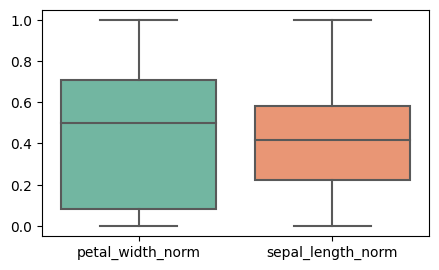

In [53]:
plt.subplots(figsize=(5,3), dpi=100)
ax = sns.boxplot(data=df_iris[['petal_width_norm','sepal_length_norm']], orient="v", palette="Set2")
# Obtemos os dados em uma mesma escala, com as características de variabilidade de cada preservados.

In [ ]:
#https://colab.research.google.com/drive/1EkCuFEcJ20FTEeXK1QBoERC9LvM8eBZm#scrollTo=ZygdfB-s5n4a